In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from cmcrameri import cm

from utils import rcparams
plt.rcParams.update(rcparams)

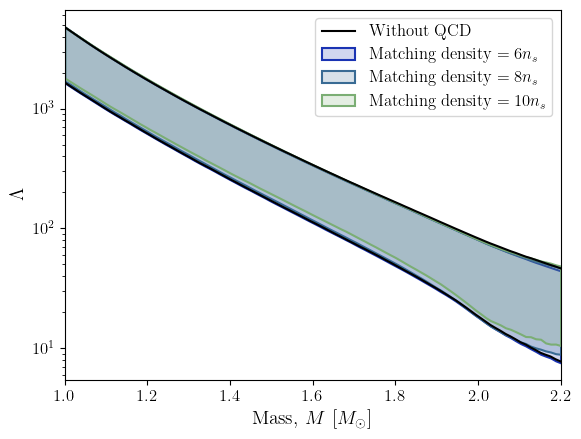

In [2]:
x = np.linspace(1.0, 2.2, 100)

fig, ax = plt.subplots()
ax.set_yscale('log')

quantiles = pd.read_csv(f'quantiles/lambda_of_m_quantiles.csv')

ax.plot(x, quantiles.loc[5,:].values, color='k', label='Without QCD')
ax.plot(x, quantiles.loc[95,:].values, color='k')

ns_list = [6,8,10]

for i, ns in enumerate(ns_list):

    quantiles = pd.read_csv(f'quantiles/lambda_of_m_quantiles_ns{ns:02}_Xmarg.csv')
    
    ax.fill_between(
        x, 
        quantiles.loc[5,:].values, 
        quantiles.loc[95,:].values, 
        color=list(cm.imola(i/(len(ns_list))))[:3]+[0.2], 
        edgecolor=cm.imola(i/(len(ns_list))),
        linewidth=1.5,
        label=f'Matching density $={ns}n_s$'
        )

ax.legend(loc='upper right')

ax.set_xlim(x[0], x[-1])
# ax.set_ylim(0.8, 2.1)

ax.set_xlabel('Mass, $M$ [$M_\odot$]')
ax.set_ylabel('$\Lambda$')

fig.savefig('figures/lambda_vs_mass_Xmarg.pdf', bbox_inches='tight')

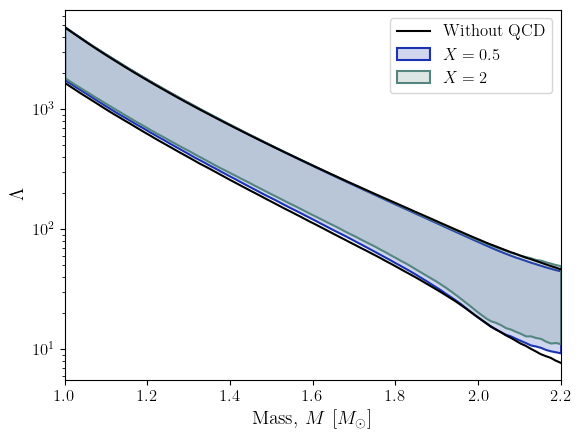

In [3]:
x = np.linspace(1.0, 2.2, 100)

fig, ax = plt.subplots()
ax.set_yscale('log')

quantiles = pd.read_csv(f'quantiles/lambda_of_m_quantiles.csv')

ax.plot(x, quantiles.loc[5,:].values, color='k', label='Without QCD')
ax.plot(x, quantiles.loc[95,:].values, color='k')

ns = 10
X_list = [0.5,2]

for i, X in enumerate(X_list):

    quantiles = pd.read_csv(f'quantiles/lambda_of_m_quantiles_ns{ns:02}_X{X}.csv')
    
    ax.fill_between(
        x, 
        quantiles.loc[5,:].values, 
        quantiles.loc[95,:].values, 
        color=list(cm.imola(i/(len(X_list))))[:3]+[0.2], 
        edgecolor=cm.imola(i/(len(X_list))),
        linewidth=1.5,
        label=f'$X={X}$'
        )

ax.legend(loc='upper right')

ax.set_xlim(x[0], x[-1])
# ax.set_ylim(0.8, 2.1)

ax.set_xlabel('Mass, $M$ [$M_\odot$]')
ax.set_ylabel('$\Lambda$')

fig.savefig(f'figures/lambda_vs_mass_ns{ns:02}_Xcomparison.pdf', bbox_inches='tight')